In [1]:
from matplotlib import pyplot as plt
import matplotlib.dates as md
import numpy as np
from osgeo import gdal
from datetime import datetime
import time
import os
import rasterio
from rasterio.mask import mask

# Operazioni di ETL sul dataset

In [2]:
path = r"./content2/data"

dir_list =[x.split('.')[0] for x in os.listdir(path)]
dir_list.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

bandMatrix = []
for file in dir_list:
    tiff_file = r"content2\data\\"+file+".tiff"
    dataset = gdal.Open(tiff_file)
    for i in range(0,12):
        try:
            if(len(bandMatrix[i].shape)==2):
                bandMatrix[i] = np.stack((bandMatrix[i],dataset.GetRasterBand(i+1).ReadAsArray()), axis=2)
            else:
                bandMatrix[i] = np.dstack((bandMatrix[i],dataset.GetRasterBand(i+1).ReadAsArray()))
        except IndexError:
            bandMatrix.append(dataset.GetRasterBand(i+1).ReadAsArray())

print(bandMatrix[0].shape)
print(bandMatrix[1].shape)
print(bandMatrix[2].shape)
#esempio: per estrarre il valore nel tempo del terreno nel 100,100 si ha:
print(bandMatrix[0][100,100,:])

Files and directories in ' ./content2/data ' :
['2016-11-05', '2016-11-12', '2016-11-15', '2016-11-22', '2016-11-25', '2016-12-02', '2016-12-05', '2016-12-12', '2016-12-15', '2016-12-22', '2016-12-25', '2017-01-01', '2017-01-04', '2017-01-14', '2017-01-24', '2017-01-31', '2017-02-03', '2017-02-10', '2017-02-13', '2017-02-20', '2017-02-23', '2017-03-02', '2017-03-05', '2017-03-12', '2017-03-15', '2017-03-22', '2017-03-25', '2017-04-01', '2017-04-04', '2017-04-11', '2017-04-14', '2017-04-21', '2017-04-24', '2017-05-01', '2017-05-04', '2017-05-11', '2017-05-14', '2017-05-21', '2017-05-24', '2017-05-31', '2017-06-03', '2017-06-10', '2017-06-13', '2017-06-20', '2017-06-23', '2017-06-30', '2017-07-03', '2017-07-08', '2017-07-10', '2017-07-13', '2017-07-15', '2017-07-18', '2017-07-20', '2017-07-23', '2017-07-25', '2017-07-28', '2017-07-30']
(229, 302, 57)
(229, 302, 57)
(229, 302, 57)
[ 9671 10760   617  2153 10796   496 10933  3319 12400   538  1198   547
   996   377   301  4281 11781  9432

# Calcolo degli indici NDVI e NDRE

In [3]:
NDVI = np.divide(np.subtract(bandMatrix[7],bandMatrix[3]),np.add(bandMatrix[7],bandMatrix[3]))
np.nan_to_num(NDVI,0)
print(NDVI)
NDRE = np.divide(np.subtract(bandMatrix[7],bandMatrix[4]),np.add(bandMatrix[7],bandMatrix[4]))
np.nan_to_num(NDRE,0)
print(NDRE)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

C:\Users\pc\AppData\Local\Temp\ipykernel_18088\2185080125.py:1: RuntimeWarning: invalid value encountered in true_divide
  NDVI = np.divide(np.subtract(bandMatrix[7],bandMatrix[3]),np.add(bandMatrix[7],bandMatrix[3]))
C:\Users\pc\AppData\Local\Temp\ipykernel_18088\2185080125.py:4: RuntimeWarning: invalid value encountered in true_divide
  NDRE = np.divide(np.subtract(bandMatrix[7],bandMatrix[4]),np.add(bandMatrix[7],bandMatrix[4]))


# Plot delle curve per NDVI e NDRE

[0.01611149070532025, 2.824065682456311, 0.33967549886557385, 0.11046812507005709, 0.6704701364217129, 0.3692130550003109, 2.295904410615352, 0.10338667740049799, 3.5747010253781553, 0.3954935038883812, 0.21586108385864583, 0.3463465470486337, 0.2597482361995945, 0.3892161143180222, 0.3529154086017272, 0.20606950563970405, 0.1677190157621065, 2.428280901853217, 3.250915458658282, 3.75657395156638, 3.985193820129997, 0.2546039915455098, 0.02261316640085549, 0.43821080121744893, 0.4174654530580041, 0.04293982806043011, 0.4497063895289527, 0.11344678046534382, 0.4426671162072145, 0.4116046052306268, 0.43952972601047113, 0.5653579974223745, 0.5213187202462761, 0.5633923242935329, 0.7484939758152149, 0.12508441607502, 0.6152853096108667, 0.7223828234565028, 0.05084702223766162, 0.49752605961936763, 0.575567809644024, 0.3224661900230396, 0.4981234768774459, 0.5707099621363143, 0.5058796041365721, 0.07764422742818475, 0.6319591291603696, 0.45772178172535416, 0.7516707967155581, 0.457874074687

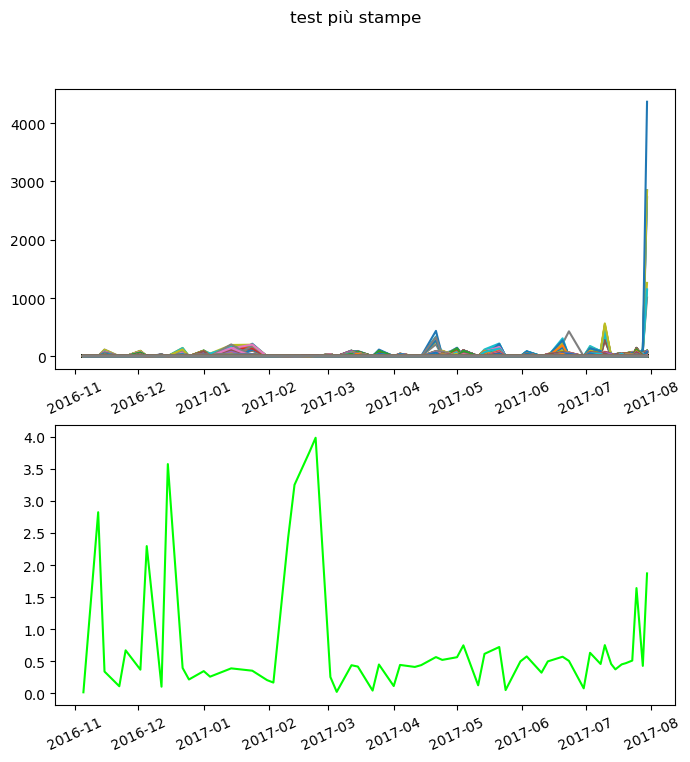

In [4]:
dateB1 = []

for a in dir_list:
    dateB1.append(datetime.strptime(a,"%Y-%m-%d"))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.suptitle('test più stampe')
plt.sca(axs[0])
plt.xticks(rotation=25) # Questo mi serve solo per ruotare le label del tempo
for a in range(NDVI.shape[0]):
    for b in range(NDVI.shape[1]):
        axs[0].plot(dateB1,NDVI[a,b,:])

mean_value = []
for a in range(NDVI.shape[2]):
    mean_value.append(np.average(NDVI[:,:,a]))

print(mean_value)
axs[1].plot(dateB1,mean_value,color="lime")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

[2.4893632131763073, 3.3802715033372808, 0.3501020448409772, 0.1700318903219711, 1.4514712115506512, 0.4462715165613816, 2.352446362047172, 2.999087699353555, 3.566177178250522, 0.4745534986155064, 0.28864378973982435, 0.37935341670500466, 0.31440877825427527, 0.5266236057113102, 0.5649926738548884, 0.7249876330489197, 1.0755757708673381, 3.1156405264974874, 3.3150193080445227, 3.7750489739339925, 4.486840201625763, 0.17758574856923642, 0.020284105479697, 0.4171004057734805, 0.39696616207367547, 0.14357312151151716, 0.7404886896652366, 0.06636859909687305, 0.33412623449398127, 0.29490569251503884, 0.3284645373502767, 0.4748188593038303, 0.8688954187009711, 0.6781531598323923, 1.0479979929089998, 0.13375253807502138, 0.9916419349060771, 0.8424387028546165, 0.03689212312731497, 0.34556478337594587, 0.4339567457995021, 0.23680868513007172, 0.3566841992432844, 0.4646701715950886, 0.8572734750669587, 0.052334820370865454, 0.8469736727865776, 0.5360240808601802, 1.0099502482980807, 0.6934452

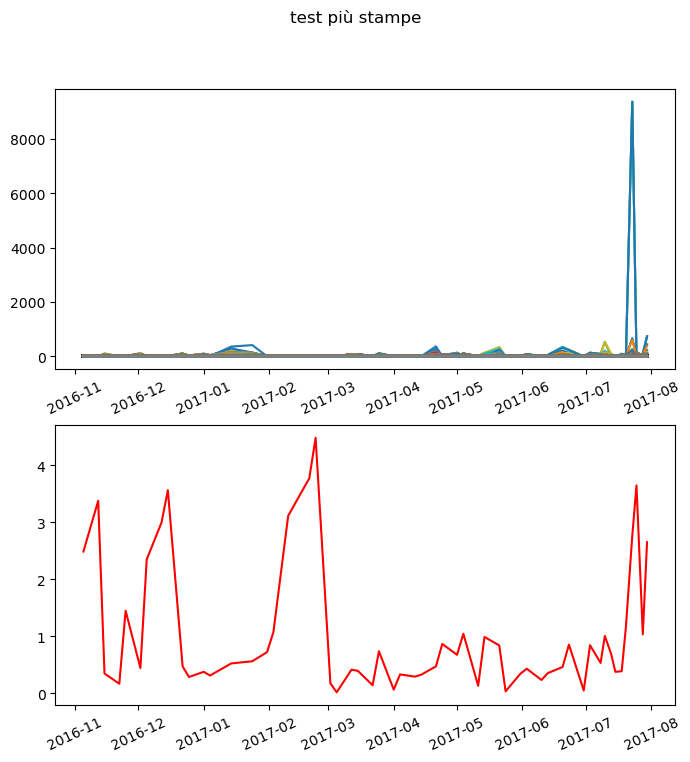

In [7]:
dateB1 = []

for a in dir_list:
    dateB1.append(datetime.strptime(a,"%Y-%m-%d"))

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
fig.suptitle('test più stampe')
plt.sca(axs[0])
plt.xticks(rotation=25) # Questo mi serve solo per ruotare le label del tempo
for a in range(NDRE.shape[0]):
    for b in range(NDRE.shape[1]):
        axs[0].plot(dateB1,NDRE[a,b,:])

mean_value = []
for a in range(NDRE.shape[2]):
    mean_value.append(np.average(NDRE[:,:,a]))

print(mean_value)
axs[1].plot(dateB1,mean_value,color="red")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()